In [3]:
# Core
import pandas as pd
import numpy as np

# Opcional: ver todas las columnas sin truncar
pd.set_option("display.max_columns", None)

RANDOM_SEED = 42  # Reproducibilidad para pasos posteriores (train/test)

In [4]:
CSV_PATH = "diabetes.csv"  # cambia si tu archivo está en otra carpeta

df = pd.read_csv(CSV_PATH)

print("Dimensiones:", df.shape)   # (filas, columnas)
df.head(3)

Dimensiones: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
expected_cols = [
    "Pregnancies",
    "GlucosePlasma",
    "BloodPressure",
    "Skin",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome",
]

missing = [c for c in expected_cols if c not in df.columns]
extra   = [c for c in df.columns if c not in expected_cols]

print("¿Faltan columnas?:", missing)
print("¿Columnas extra?:", extra)

# Conversión opcional de Outcome a entero (por si viene como float/obj)
if df["Outcome"].dtype != "int64" and df["Outcome"].dtype != "int32":
    df["Outcome"] = df["Outcome"].astype(int)

# Vista rápida de tipos
df.info()


¿Faltan columnas?: ['GlucosePlasma', 'Skin']
¿Columnas extra?: ['Glucose', 'SkinThickness']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
variable_info = {
    "Pregnancies": "Número de veces que ha estado embarazada",
    "GlucosePlasma": "Concentración de glucosa en plasma",
    "BloodPressure": "Presión diastólica (mm Hg)",
    "Skin": "Grosor del pliegue cutáneo del tríceps (mm)",
    "Insulin": "Insulina sérica a las 2 horas (µU/ml)",
    "BMI": "Índice de masa corporal (kg / m²)",
    "DiabetesPedigreeFunction": "Función de pedigree de diabetes (riesgo familiar)",
    "Age": "Edad (años)",
    "Outcome": "Etiqueta: 1 = diabetes, 0 = no diabetes",
}

glosario = pd.DataFrame(
    [{"Columna": k, "Descripción": v} for k, v in variable_info.items()]
).set_index("Columna")

glosario

,Descripción
Columna,
Pregnancies,Número de veces que ha estado embarazada
GlucosePlasma,Concentración de glucosa en plasma
BloodPressure,Presión diastólica (mm Hg)
Skin,Grosor del pliegue cutáneo del tríceps (mm)
Insulin,Insulina sérica a las 2 horas (µU/ml)
BMI,Índice de masa corporal (kg / m²)
DiabetesPedigreeFunction,Función de pedigree de diabetes (riesgo familiar)
Age,Edad (años)
Outcome,"Etiqueta: 1 = diabetes, 0 = no diabetes"


In [7]:
print("Valores únicos en Outcome:", sorted(df["Outcome"].unique()))
print("Conteo por clase:")
print(df["Outcome"].value_counts(dropna=False))

Valores únicos en Outcome: [np.int64(0), np.int64(1)]
Conteo por clase:
Outcome
0    500
1    268
Name: count, dtype: int64


In [8]:
# Estadísticas principales de todas las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
cols_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

(df[cols_check] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [10]:
df.skew(numeric_only=True)   # asimetría: 0 ~ simétrica
df.kurtosis(numeric_only=True)  # curtosis: >3 = colas pesadas

,0
Pregnancies,0.159220
Glucose,0.640780
BloodPressure,5.180157
SkinThickness,-0.520072
Insulin,7.214260
BMI,3.290443
DiabetesPedigreeFunction,5.594954
Age,0.643159
Outcome,-1.600930


In [11]:
df["Outcome"].value_counts(normalize=True) * 100

,proportion
Outcome,
0,65.104167
1,34.895833


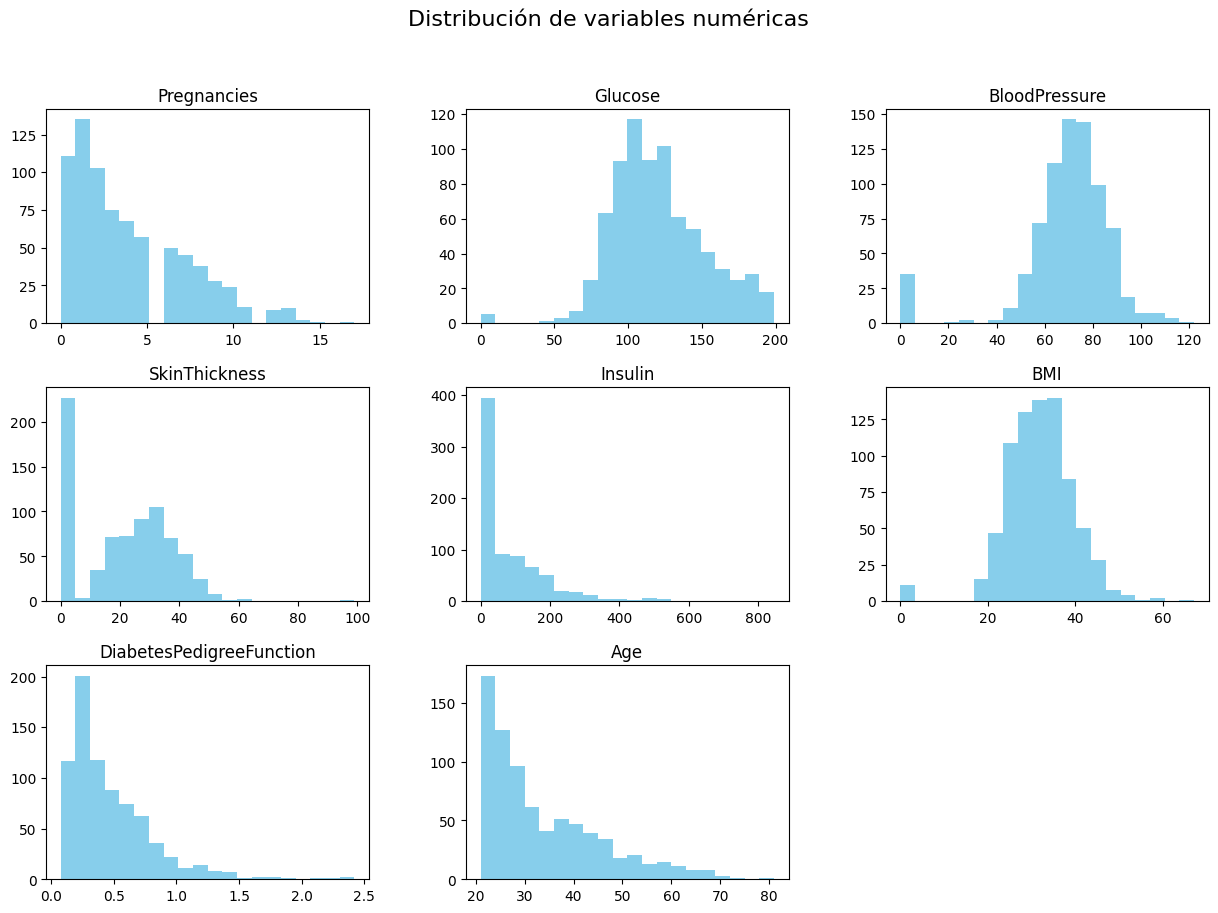

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

df[numeric_cols].hist(bins=20, figsize=(15, 10), grid=False, color="skyblue")
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

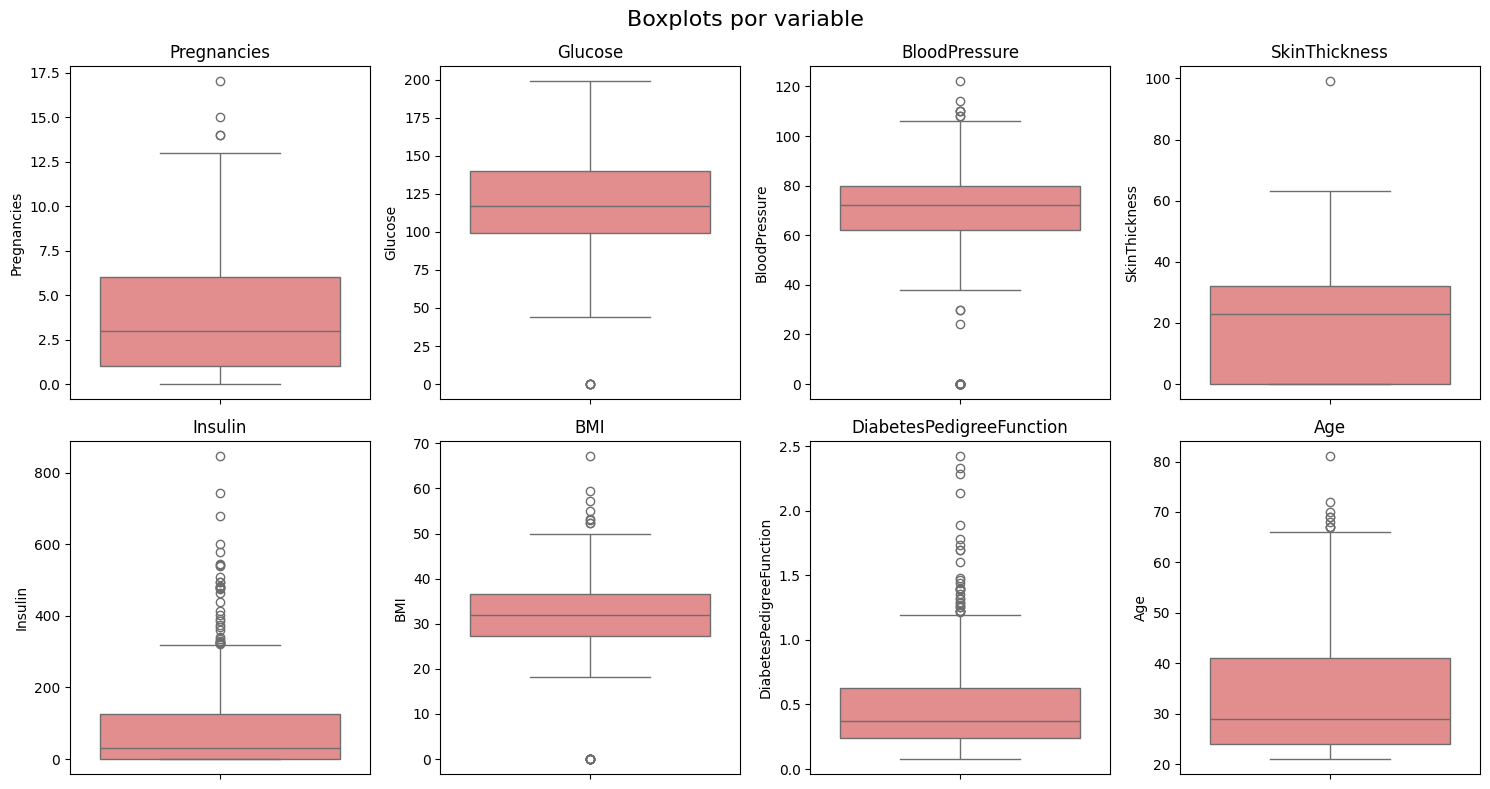

In [13]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(col)
plt.suptitle("Boxplots por variable", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-438413951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


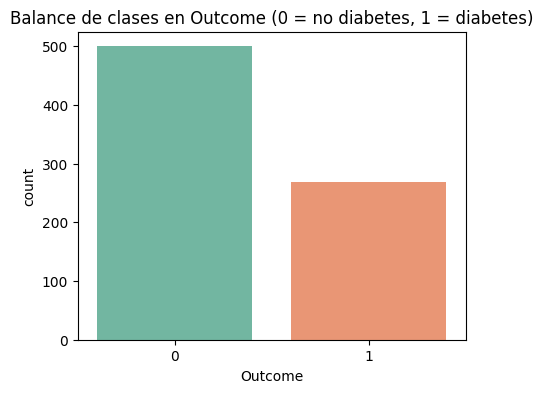

In [14]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Balance de clases en Outcome (0 = no diabetes, 1 = diabetes)")
plt.show()

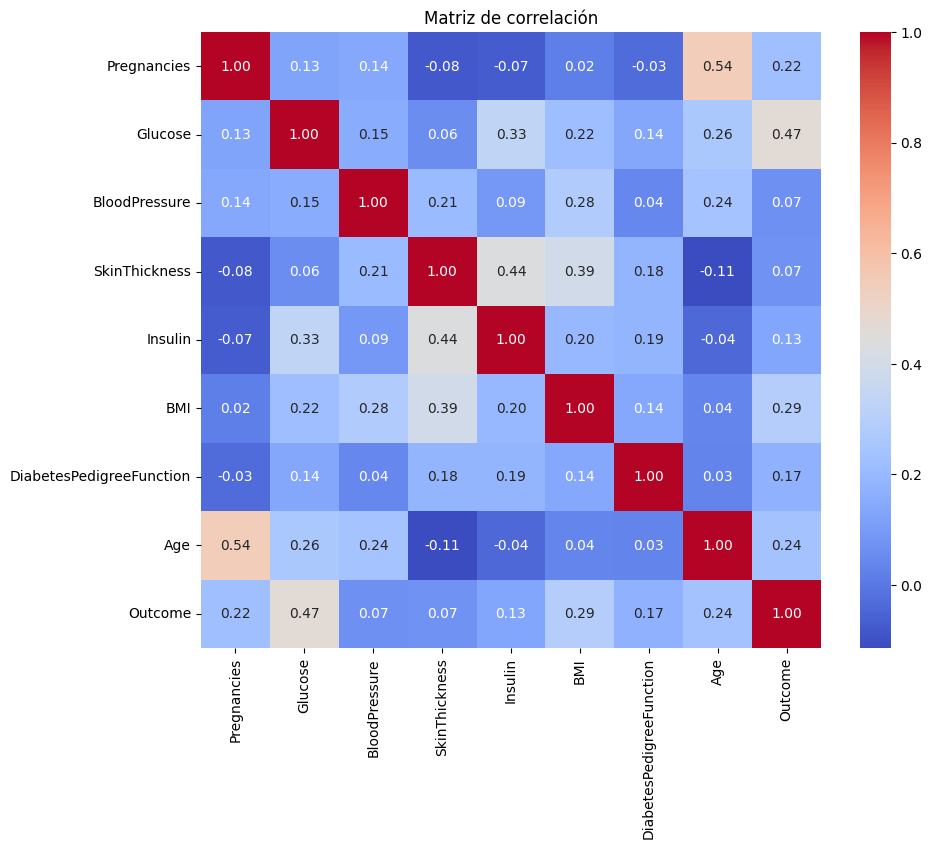

In [16]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()